In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import researchpy

In [2]:
ls

CCSwWLzjeFg.jpg
EBooks/
McKinsey/
NDA_ Kaivalya Anand Pandey.pdf
Russian/
STI/
Self Improvemenet Books/
Ubego/
newhamp.csv
sochimoscowenglish.pdf
sochimoscowrussian.pdf
~$ Engineer Task _ MRI processing and CNN model building.docx
~$22 _Consent for PD Processing_18+.doc
~$ster_Consent for Enrolment.docx
ИСИЭЗ_НИУ_ВШЭ.ipynb


# 1 Exploratory Data Analysis

In [4]:
data = pd.read_csv('newhamp.csv')

In [5]:
data.head()

,Unnamed: 0,votesys,Obama,Clinton,dem,povrate,pci,Dean,Kerry,white,absentee,population,pObama
0,0,D,371,362,979,0.0653,25940,0.27820,0.32030,0.98312,0.059857,4693.0,0.378958
1,1,D,345,333,913,0.0380,19773,0.24398,0.36747,0.97349,0.050449,4266.0,0.377875
2,2,D,375,570,1305,0.0428,19986,0.20096,0.41627,0.96739,0.043649,7006.0,0.287356
3,3,H,92,89,268,0.0669,25627,0.28495,0.33333,0.97892,0.107356,1033.0,0.343284
4,4,D,668,595,1633,0.0332,32667,0.24937,0.37781,0.97986,0.074706,7033.0,0.409063


In [6]:
data.shape

(276, 13)

In [7]:
data.isna().sum()

Unnamed: 0    0
votesys       0
Obama         0
Clinton       0
dem           0
povrate       0
pci           0
Dean          0
Kerry         0
white         0
absentee      0
population    0
pObama        0
dtype: int64

<AxesSubplot:xlabel='votesys', ylabel='count'>

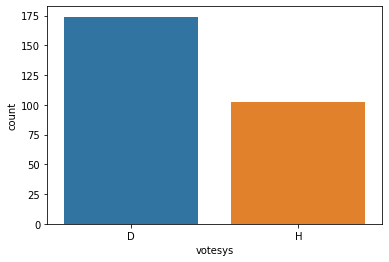

In [10]:
sns.countplot(x=data['votesys'])

In [12]:
data['ward_winner'] = np.where(data['Obama']>data['Clinton'],'O','C')

<AxesSubplot:xlabel='ward_winner', ylabel='count'>

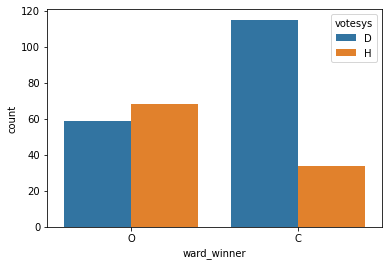

In [52]:
sns.countplot(x=data['ward_winner'],hue= data['votesys'])

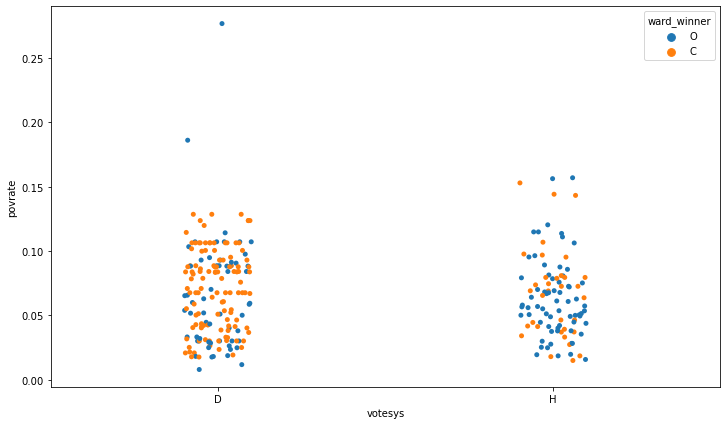

In [73]:
plt.figure(figsize=(12,7))
sns.stripplot(data=data, x='votesys', y='povrate', hue="ward_winner")
plt.show()

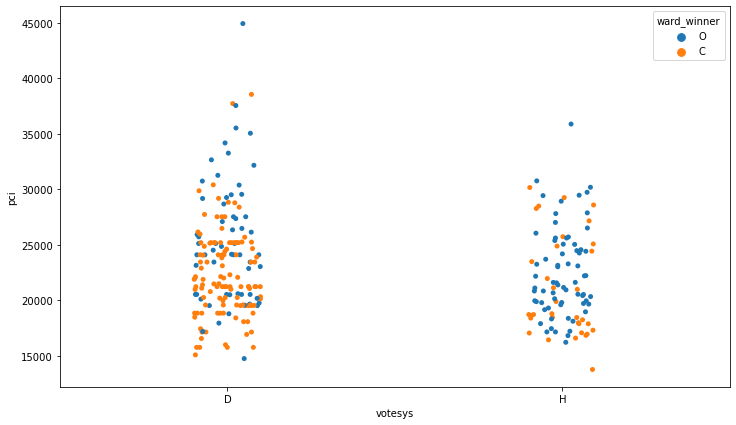

In [71]:
plt.figure(figsize=(12,7))
sns.stripplot(data=data, x='votesys', y='pci', hue="ward_winner")
plt.show()

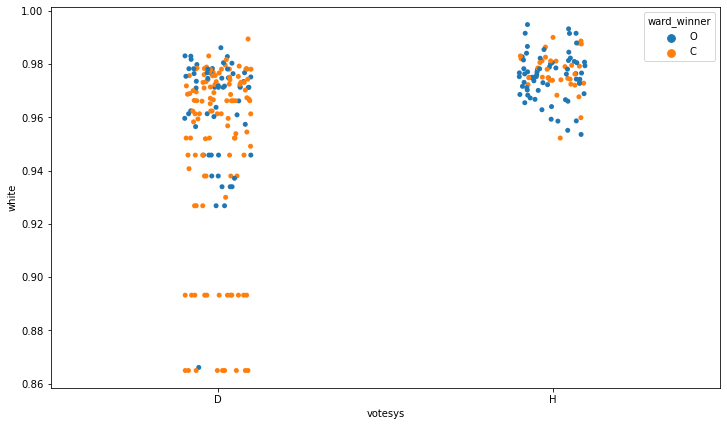

In [72]:
plt.figure(figsize=(12,7))
sns.stripplot(data=data, x='votesys', y='white', hue="ward_winner")
plt.show()

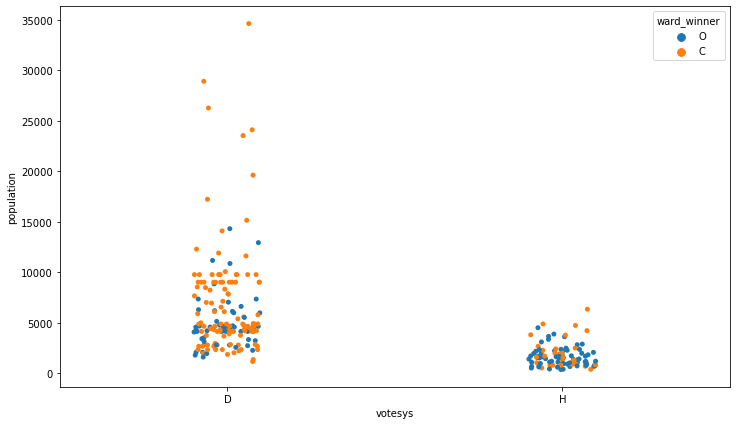

In [74]:
plt.figure(figsize=(12,7))
sns.stripplot(data=data, x='votesys', y='population', hue="ward_winner")
plt.show()

In [50]:
data.dtypes

Unnamed: 0       int64
votesys         object
Obama            int64
Clinton          int64
dem              int64
povrate        float64
pci              int64
Dean           float64
Kerry          float64
white          float64
absentee       float64
population     float64
pObama         float64
ward_winner     object
dtype: object

In [131]:
data[['povrate','pci','white']].describe()

,povrate,pci,white
count,276.000000,276.000000,276.000000
mean,0.067073,22881.362319,0.962178
std,0.034728,4659.451843,0.027806
min,0.007900,13784.000000,0.864930
25%,0.040200,19592.000000,0.959597
50%,0.066300,21941.500000,0.972310
75%,0.088375,25209.000000,0.978113
max,0.276900,44936.000000,0.994880


## 2. To indicate the strength of association between two nominal variables Cramer's V is often used. I am using "researchpy" which produces Pandas DataFrames that contain relevant statistical testing information that is commonly required for academic research. 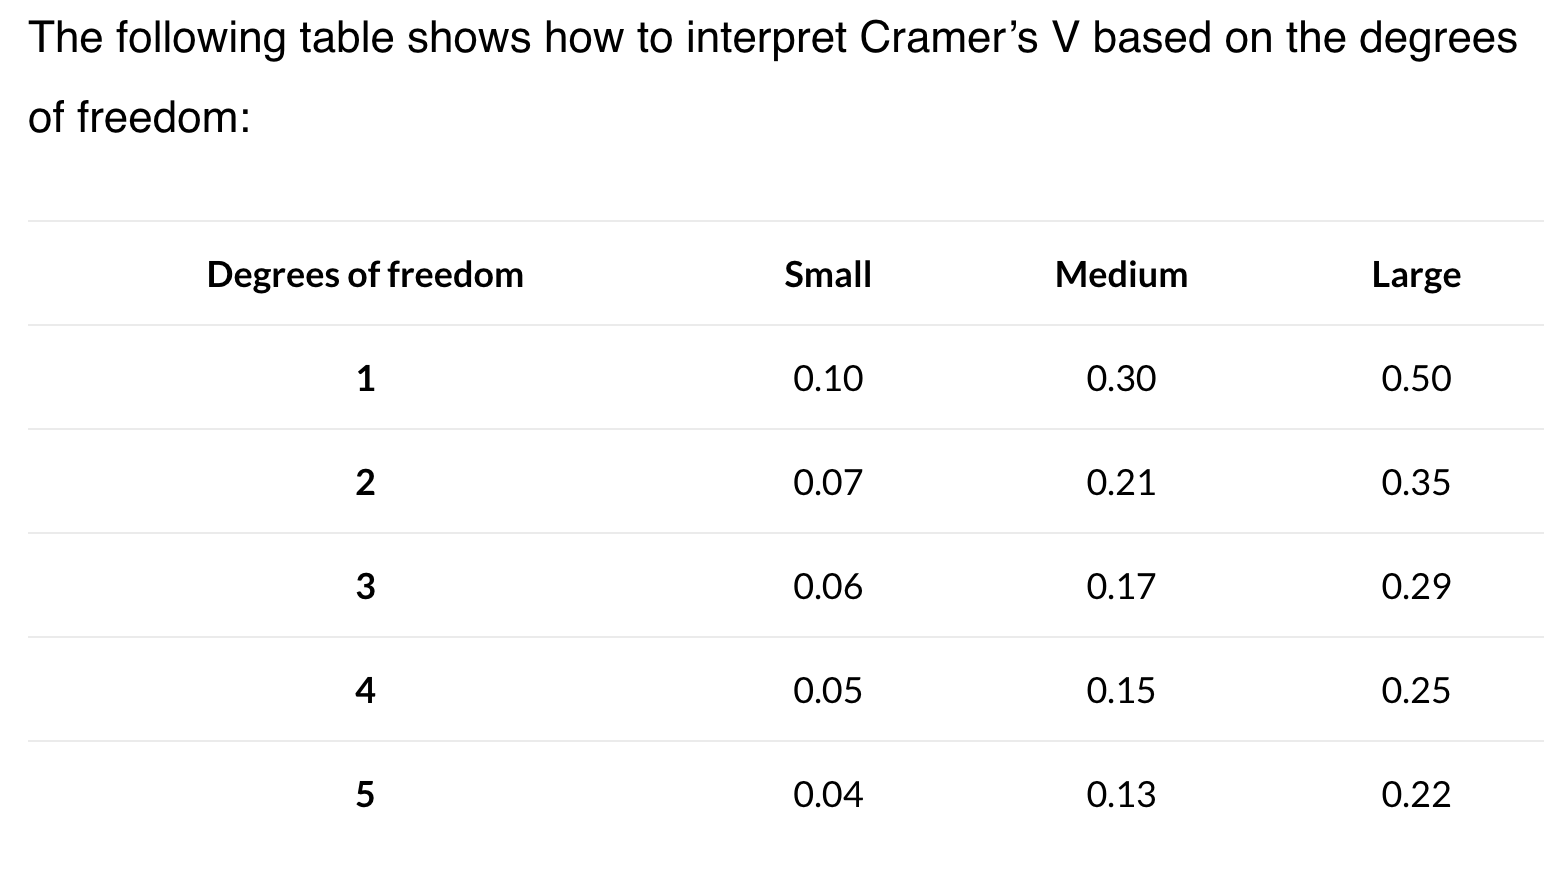 
## The degrees of freedom (df*) is for Cramér's V the minimum of the number of rows, or number of columns, then minus one.



In [35]:
cont = pd.crosstab(data['votesys'], data['ward_winner'])
cont

ward_winner,C,O
votesys,,
D,115,59
H,34,68


In [36]:
crosstab, res = researchpy.crosstab(data['votesys'],data['ward_winner'],test='chi-square')

In [38]:
res

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,27.7792
1,p-value =,0.0000
2,Cramer's phi =,0.3173


### So, as can be seen from the result, Cramér's V is 0.3173. To classify this, we also need the degrees of freedom. This is simply:

### df* =MIN(𝑟,𝑐)−1 

### Where  𝑟  is the number of rows, and  𝑐  the number of columns.

In [39]:
df = min(cont.shape[0], cont.shape[1]) - 1
df

1

In [40]:
V = res.iloc[2,1]
V

0.3173

In [41]:
if df == 1:
    if V < 0.10:
        asso = 'negligible'
    elif V < 0.30:
        asso = 'small'
    elif V < 0.50:
        asso = 'medium'
    else:
        asso = 'large'
elif df == 2:
    if V < 0.07:
        asso = 'negligible'
    elif V < 0.21:
        asso = 'small'
    elif V < 0.35:
        asso = 'medium'
    else:
        asso = 'large'
elif df == 3:
    if V < 0.06:
        asso = 'negligible'
    elif V < 0.17:
        asso = 'small'
    elif V < 0.29:
        asso = 'medium'
    else:
        asso = 'large'
elif df == 4:
    if V < 0.05:
        asso = 'negligible'
    elif V < 0.15:
        asso = 'small'
    elif V < 0.25:
        asso = 'medium'
    else:
        asso = 'large'
else:
    if V < 0.05:
        asso = 'negligible'
    elif V < 0.13:
        asso = 'small'
    elif V < 0.22:
        asso = 'medium'
    else:
        asso = 'large'

asso

'medium'

### So we found their is medium level of association between voting method and winner. However I don't think  that method of voting made affect on results, as we can see association is medium and not strong. 

### 3. Below now we will try to calculate whether other factors have affect on result of elections

In [87]:
data.head()

,Unnamed: 0,votesys,Obama,Clinton,dem,povrate,pci,Dean,Kerry,white,absentee,population,pObama,ward_winner
0,0,D,371,362,979,0.0653,25940,0.27820,0.32030,0.98312,0.059857,4693.0,0.378958,O
1,1,D,345,333,913,0.0380,19773,0.24398,0.36747,0.97349,0.050449,4266.0,0.377875,O
2,2,D,375,570,1305,0.0428,19986,0.20096,0.41627,0.96739,0.043649,7006.0,0.287356,C
3,3,H,92,89,268,0.0669,25627,0.28495,0.33333,0.97892,0.107356,1033.0,0.343284,O
4,4,D,668,595,1633,0.0332,32667,0.24937,0.37781,0.97986,0.074706,7033.0,0.409063,O


#### 3.1 Correlation between "povrate" and ward winner. Since povrate , pci, white, population are continous variable and ward_winner is categorical, we will use Point Biserial Method to find strength of association. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship.

In [90]:
data.dtypes

Unnamed: 0       int64
votesys         object
Obama            int64
Clinton          int64
dem              int64
povrate        float64
pci              int64
Dean           float64
Kerry          float64
white          float64
absentee       float64
population     float64
pObama         float64
ward_winner     object
dtype: object

In [103]:
data = data.replace(['O','C'],[0,1]) ## Here we are assigning 0 to Obama and 1 to Hilary Clinton. 

In [124]:
corr_pov = stats.pointbiserialr(data['povrate'],data['ward_winner'])
print(corr_pov)

PointbiserialrResult(correlation=0.08677542683901837, pvalue=0.1504929790520673)


#### Our null hypothesis was that there is no correlation between povrate and ward winner and as p value is greater tha 0.05, we can not reject null hypothesis and so there is no correlation between povrate and ward winner

In [125]:
corr_pci = stats.pointbiserialr(data['pci'],data['ward_winner'])
print(corr_pci)

PointbiserialrResult(correlation=-0.203381942516842, pvalue=0.0006760930834256839)


#### Our null hypothesis was that there is no correlation between pci and ward winner and as p value is less than 0.05, we can  reject null hypothesis and so there is negative low correlation between pci and ward winner as it is shown above.

In [128]:
corr_white = stats.pointbiserialr(data['white'],data['ward_winner'])
print(corr_white)

PointbiserialrResult(correlation=-0.25772302389693397, pvalue=1.4533124698121049e-05)


### Our null hypothesis was that there is no correlation between white which means propotion of white people and ward winner. However our p value is less than 0.05, so we can reject null hypothesis. As we can see in correlation coefficient, there is negative low correaltion

In [127]:
corr_population = stats.pointbiserialr(data['population'],data['ward_winner'])
print(corr_population)

PointbiserialrResult(correlation=0.2957366742094713, pvalue=5.638424294868067e-07)


### Our null hypothesis was that there is no correlation between population and ward winner. However our p value is less than 0.05, so we can reject null hypothesis. As we can see in correlation coefficient, there is positve low correaltion

## Conclusion - After analysing the data with selected factors and their impact on the result, we found that voting method and other factors had some casual impact on elections but our analysis can verify that elections were not rigged

### 4 First Model Building

In [166]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold,GridSearchCV

In [132]:
data.head()

,Unnamed: 0,votesys,Obama,Clinton,dem,povrate,pci,Dean,Kerry,white,absentee,population,pObama,ward_winner
0,0,D,371,362,979,0.0653,25940,0.27820,0.32030,0.98312,0.059857,4693.0,0.378958,0
1,1,D,345,333,913,0.0380,19773,0.24398,0.36747,0.97349,0.050449,4266.0,0.377875,0
2,2,D,375,570,1305,0.0428,19986,0.20096,0.41627,0.96739,0.043649,7006.0,0.287356,1
3,3,H,92,89,268,0.0669,25627,0.28495,0.33333,0.97892,0.107356,1033.0,0.343284,0
4,4,D,668,595,1633,0.0332,32667,0.24937,0.37781,0.97986,0.074706,7033.0,0.409063,0


In [134]:
data['votesys'] = data['votesys'].map({'D':100,'H':200})

In [148]:
X = data[['votesys','povrate','pci','white','population','absentee','Dean','Kerry','dem']]
Y = data['ward_winner']

In [149]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)

### 4.1 Feature Selection

In [150]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [151]:
mutual_info = mutual_info_classif(x_train,y_train)

<AxesSubplot:>

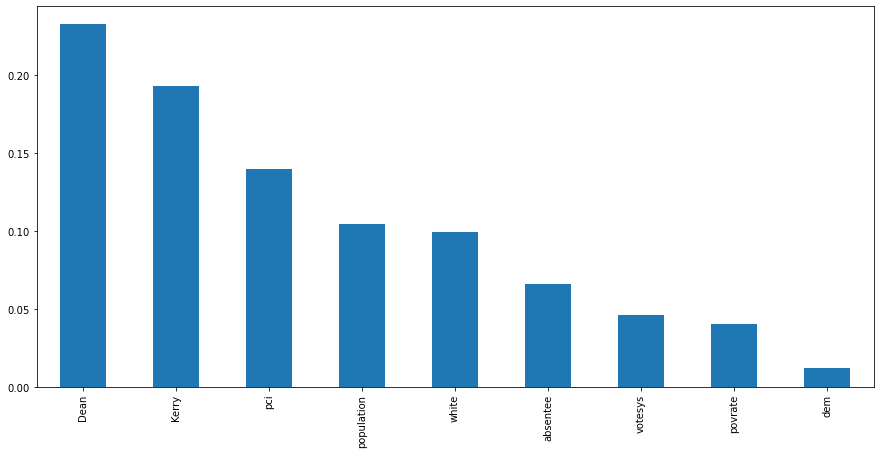

In [152]:
mutual_info = pd.Series(mutual_info)
mutual_info.index=['votesys','povrate','pci','white','population','absentee','Dean','Kerry','dem']
mutual_info.sort_values(ascending=False).plot.bar(figsize =(15,7))

### Since features are not much, I have decided to take all of them

In [158]:
n_estimators = [int(i) for i in np.linspace(start = 50, stop = 120, num = 25)]

max_features = ['auto','sqrt']

max_depth = [2,8]  

min_samples_split = [2,8]

min_samples_leaf = [1,8] 

bootstrap = [True, False]

In [159]:
grid = {'n_estimators': n_estimators,'max_features':max_features,'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap':bootstrap}
print(grid)

{'n_estimators': [50, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 8], 'min_samples_split': [2, 8], 'min_samples_leaf': [1, 8], 'bootstrap': [True, False]}


In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf_clf = RandomForestClassifier()

In [164]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [168]:
random_forest_random_grid = GridSearchCV(estimator=rf_clf,param_grid=grid,cv=cv)

In [170]:
random_forest_random_grid.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 8],
                         'min_samples_split': [2, 8],
                         'n_estimators': [50, 52, 55, 58, 61, 64, 67, 70, 73,
                                          76, 79, 82, 85, 87, 90, 93, 96, 99,
                                          102, 105, 108, 111, 114, 117, 120]})

In [171]:
random_forest_random_grid.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=8,
                       n_estimators=93)

### Now our model is built and optimised, we will try to predict who will win in which ward

In [177]:
pred = random_forest_random_grid.best_estimator_.predict(x_test)

In [185]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.85      0.77      0.81        30

    accuracy                           0.80        56
   macro avg       0.81      0.81      0.80        56
weighted avg       0.81      0.80      0.80        56



<AxesSubplot:>

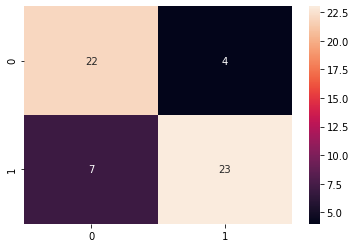

In [187]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

### I used Random Forest Classifer as genrally it performs better when we have combined categorical and continous variables. It is also capable to handle large datasets. Our model performed fine with f1 score of 0.8. 

### 5. Second Model Building

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(penalty='l2')

In [214]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [220]:
print(cross_val_score(logreg,x_train,y_train, cv=cv,scoring='f1'))


[0.69230769 0.55555556 0.66666667 0.76190476 0.72727273 0.81818182
 0.76190476 0.60869565 0.66666667 0.63636364 0.59259259 0.75
 0.8        0.66666667 0.66666667 0.7        0.63636364 0.66666667
 0.66666667 0.76190476 0.72727273 0.72       0.63636364 0.52631579
 0.75       0.63157895 0.69230769 0.72727273 0.7826087  0.75      ]


In [221]:
preds = logreg.predict(x_test)

In [222]:
preds

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [223]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        26
           1       0.88      0.70      0.78        30

    accuracy                           0.79        56
   macro avg       0.80      0.79      0.79        56
weighted avg       0.80      0.79      0.78        56



<AxesSubplot:>

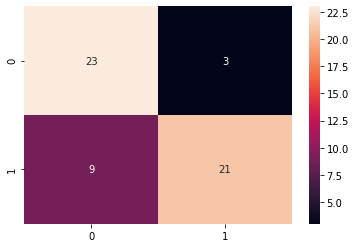

In [224]:
sns.heatmap(confusion_matrix(y_test,preds),annot=True)

### As we can see Regularsied Logistic Regression's performance is less as compared to our Random Forest Classifier model